## House Pricing Assignment (Advance Regression)
#### Author: Mahalakshmi Totad

#### Problem Statement :
Surprise Housing uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. So build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### Specifically, The company is looking at prospective properties to buy to enter the Australian market.

#### The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal::
- To model the price of houses with the available independent variables. 
- The model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- The model will be a good way for management to understand the pricing dynamics of a new market.

## Exploratory Data Analysis  

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Data sourcing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [5]:
housePricing = pd.read_csv("train.csv")

In [35]:
housePricing.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [34]:
housePricing.shape

(1460, 75)

In [8]:
housePricing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
housePricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Data cleaning

#### Check for Missing/null values.

In [24]:
housePricing.isnull().sum().head(41)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
dtype: int64

In [23]:
housePricing.isnull().sum().tail(41)

HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

#### Columns having very high number of null values:  LotFrontage,Alley,PoolQC,Fence,MiscFeature,FireplaceQu . So let's drop them

In [28]:
housePricing.shape

(1460, 81)

In [29]:
housePricing.drop(['LotFrontage'], axis = 1, inplace = True)
housePricing.drop(['Alley'], axis = 1, inplace = True)
housePricing.drop(['PoolQC'], axis = 1, inplace = True)
housePricing.drop(['Fence'], axis = 1, inplace = True)
housePricing.drop(['MiscFeature'], axis = 1, inplace = True)
housePricing.drop(['FireplaceQu'], axis = 1, inplace = True)

In [38]:
housePricing.shape

(1460, 75)

In [40]:
housePricing.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotArea          1073
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 75, dtype: int64

#### There are few more columns with missing/null values let's analyze and Impute them

#### Imputation : Let's check if we can impute GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond since there are 81  missing values

In [46]:
housePricing.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [47]:
# Most of the values are Attchd, so we can map the NAN values of 'GarageQual' to Attchd Type
housePricing['GarageType'] = housePricing['GarageType'].replace(np.nan,'Attchd')

In [48]:
housePricing.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [49]:
# It's a numberic variable so let's check for outliers then try to impute with median

In [ ]:
# Most of the values are Attchd, so we can map the NAN values of 'GarageQual' to Attchd Type
housePricing['GarageType'] = housePricing['GarageType'].replace(np.nan,'Attchd')

In [ ]:
housePricing.GarageQual.value_counts()

In [ ]:
housePricing.GarageQual.value_counts()

In [ ]:
# Most of the values are TA, so we can map the NAN values of 'GarageQual' to TA-MODE
housePricing['GarageQual'] = housePricing['GarageQual'].replace(np.nan,'TA')

In [45]:
housePricing.isnull().sum().tail(40)

BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond       81
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

## Step 2: Data Preparation

In [39]:
housePricing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

- convert  feature values into categorical string values before proceeding with model building

#### Segmentation : Grouping and creating new variables for better analysis

In [20]:
weathersit_count = bikeSharing.groupby("weathersit")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
season_count = bikeSharing.groupby("season")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
mnth_count = bikeSharing.groupby("mnth")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
weekday_count = bikeSharing.groupby("weekday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)


In [21]:
holiday_count = bikeSharing.groupby("holiday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)
workingday_count = bikeSharing.groupby("workingday")["cnt"].sum().reset_index().sort_values(by = "cnt" , ascending = False)


In [22]:
temp_groups= pd.cut(bikeSharing['temp'],bins = 5,precision =0,labels=['0-3','3-6','6-9','9-12','12-15'])


## Step 3: Visualising the Data

#### Visualising Numeric Variables


Standardising Values 
- Handle Outliers

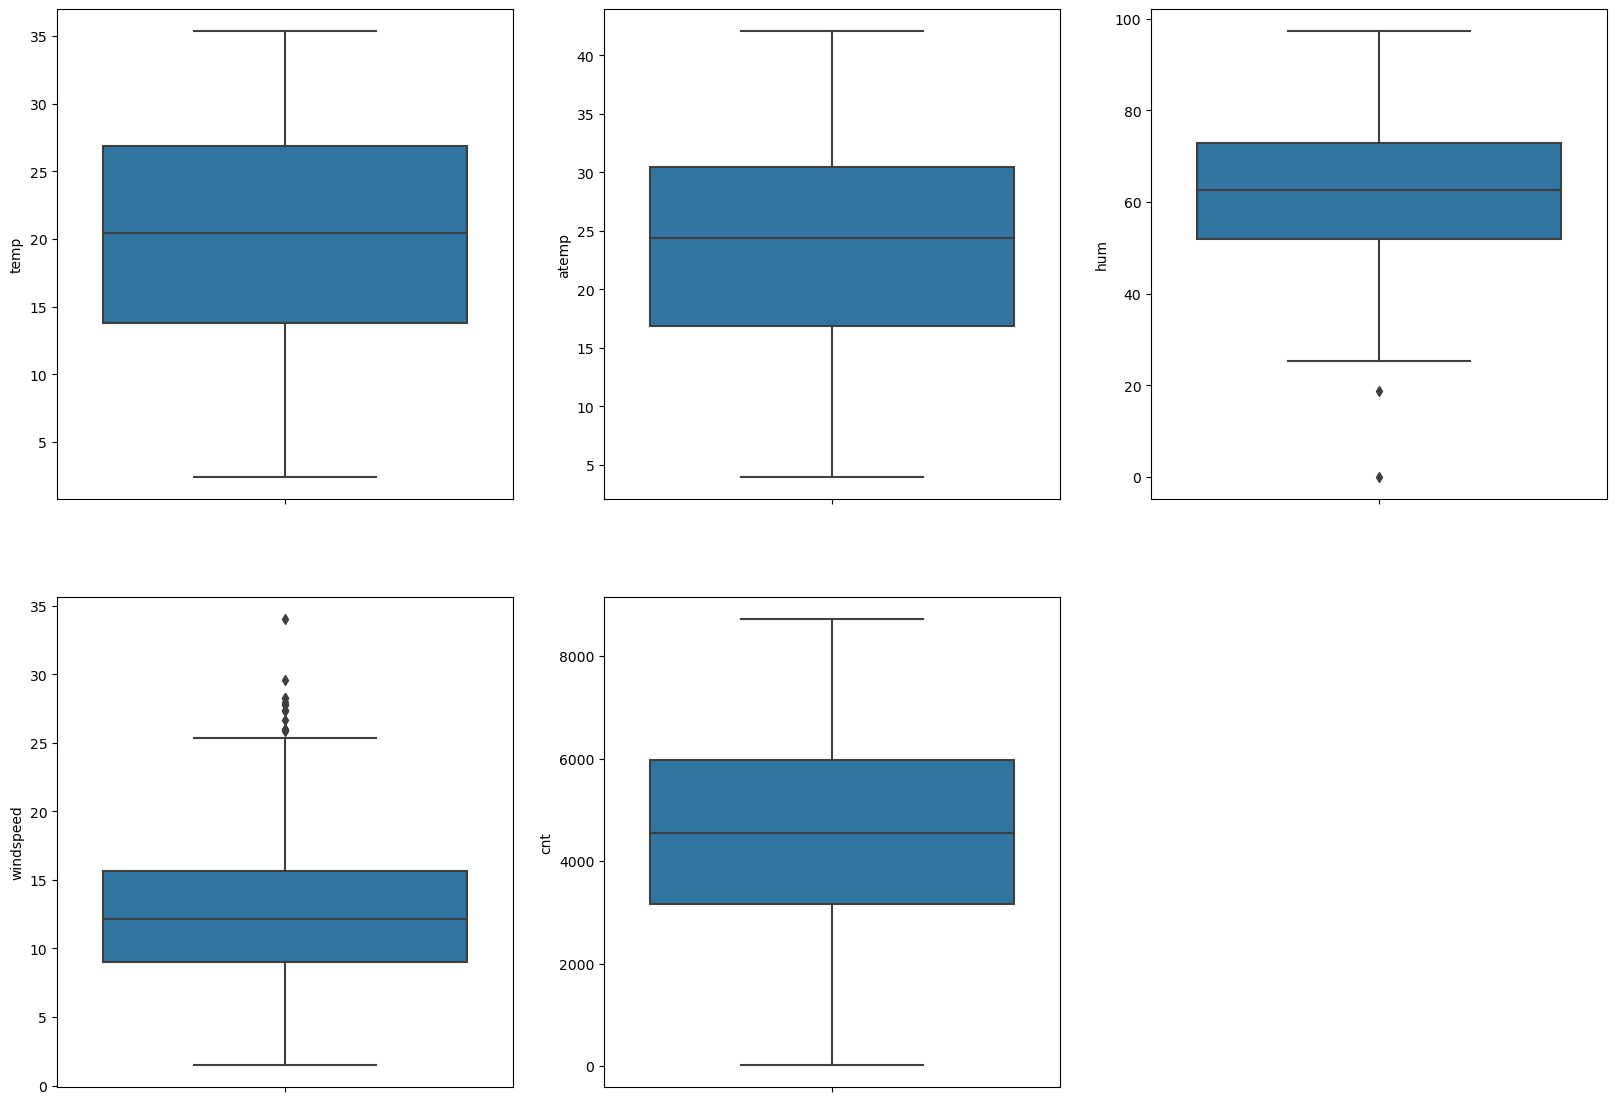

In [23]:
numericColumns = ['temp', 'atemp', 'hum', 'windspeed','cnt']
plt.figure(figsize=(20,14))

i = 1
for variables in numericColumns:
    plt.subplot(2,3,i)
    sns.boxplot(y=variables, data=bikeSharing)
    i+=1

Observation : Doesn't seem like any variables have outliers. Hence leave them as is.

### Univariate Analysis

### Visualize pairplots for continuous numeric variables


<Figure size 1500x3000 with 0 Axes>

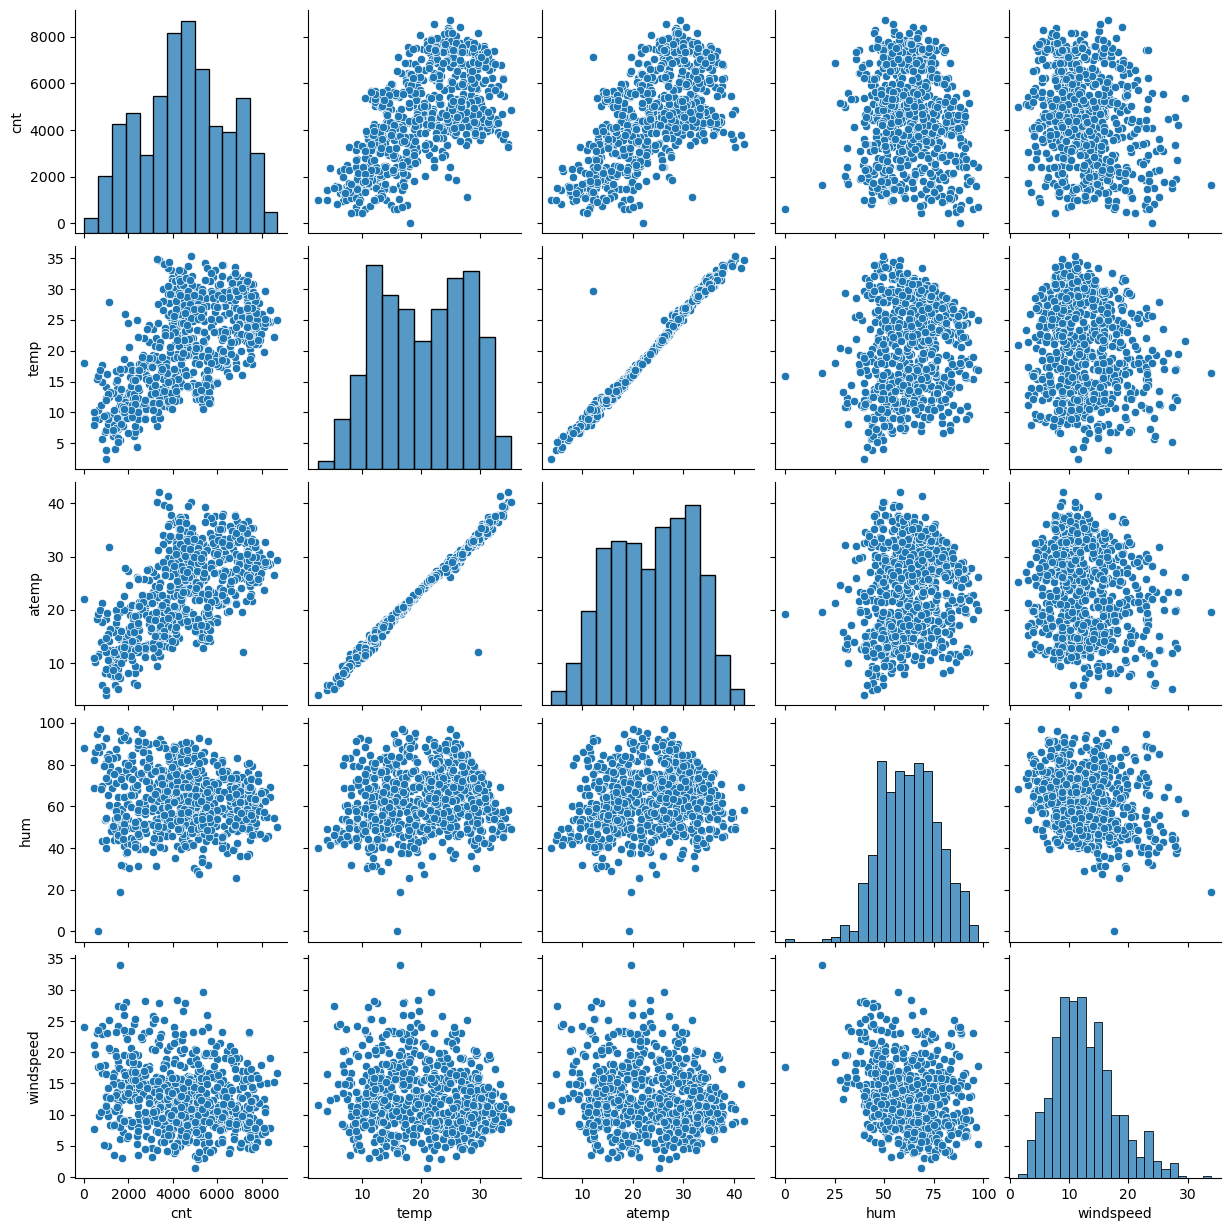

In [24]:
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

#### Observation : At first glance cnt seems to have linear realtionship with temp and atemp

### Visualize correlation between continuous variables using heatmap


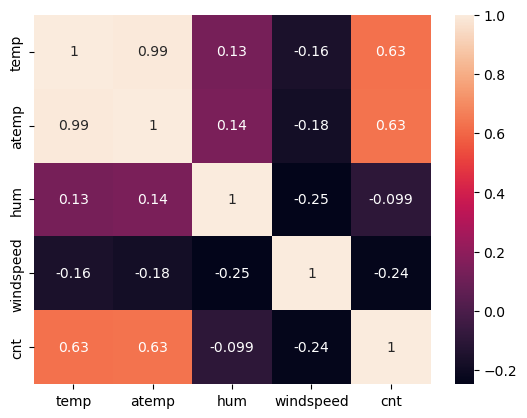

In [25]:
sns.heatmap(bikeSharing[['temp','atemp','hum','windspeed','cnt']].corr(), annot = True)
plt.show()

#### Observation : Correlation between temp and atemp is 0.99, which is pretty high indicating multi-colinearity. Hence we can use only one of them in analysis later

### Visualising Categorical Variables


In [26]:
# Targe Variable is 'cnt' so let's plot some graphs

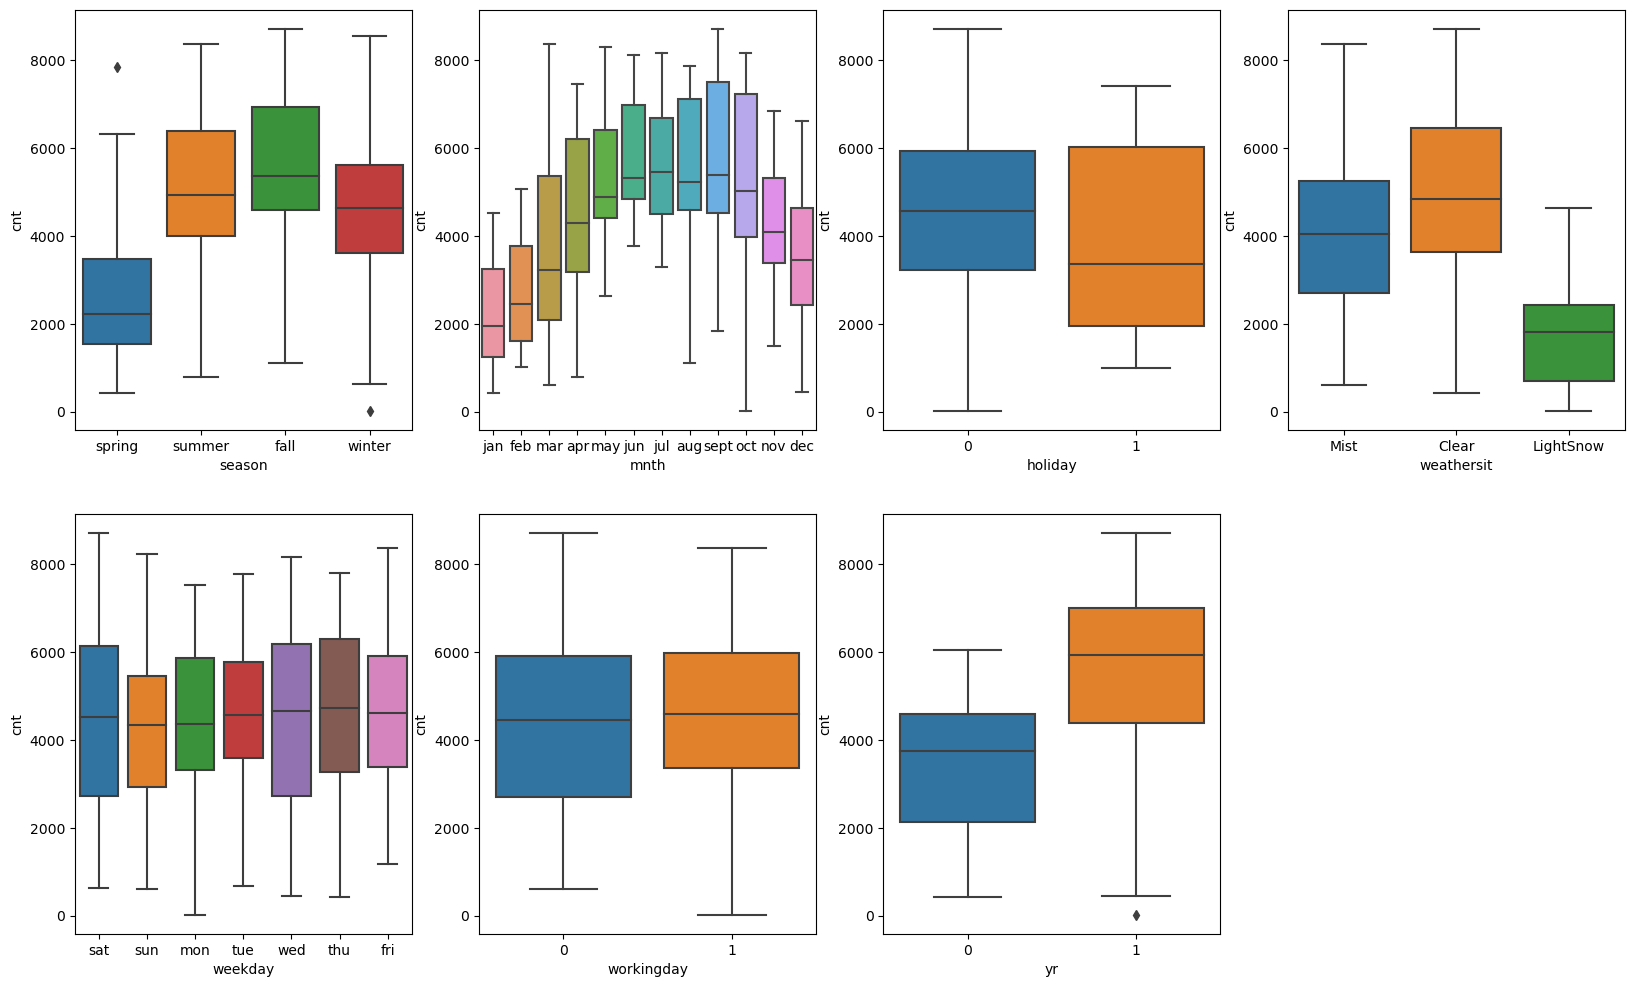

In [27]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bikeSharing)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bikeSharing)
plt.show()

### weekday and month v/s rent count 

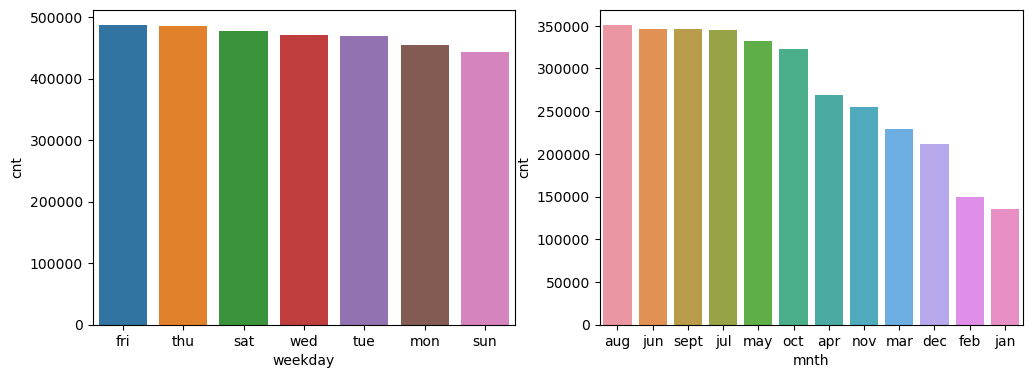

In [28]:
plt.figure(figsize=(12, 9))

plt.subplot(2,2,1)
sns.barplot(x = 'weekday', y = 'cnt', data = weekday_count)
plt.subplot(2,2,2)
sns.barplot(x = 'mnth', y = 'cnt', data = mnth_count)
plt.show()

### holiday and working v/s rent count

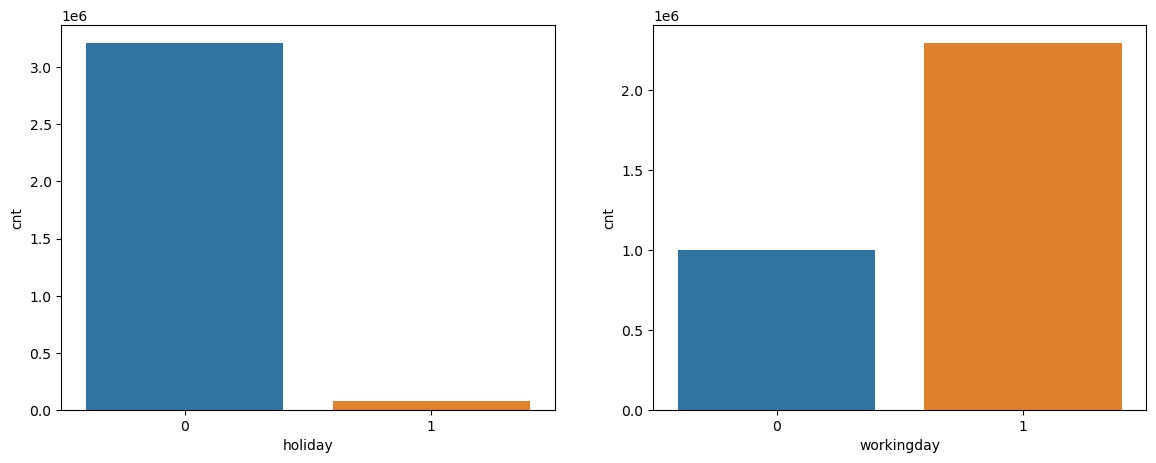

In [29]:
plt.figure(figsize=(14, 11))
plt.subplot(2,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = holiday_count)
plt.subplot(2,2,2)
sns.barplot(x = 'workingday', y = 'cnt', data = workingday_count)

plt.show()

### season and weather v/s rent count


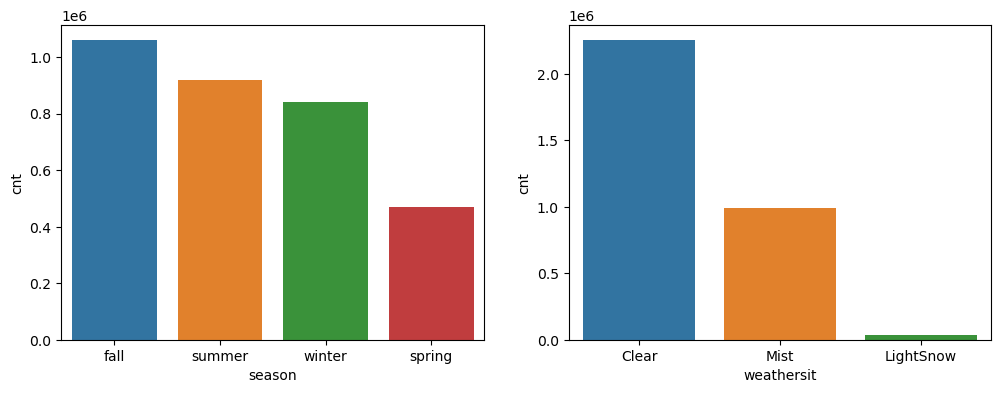

In [30]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'season', y = 'cnt', data = season_count)
plt.subplot(2,2,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = weathersit_count)
plt.show()

### Univariate Analysis Inference
- Number of bike rentals has increased in 2019 compared to 2018 which is a good sign for Boombikes as bike renting trend is showing up curve
- Among weekdays Friday and Thursday have highest number of bikes rented
- August month has most bike rental count
- Holiday have less people renting
- Working days have 60% more people renting than non-work days or holidays
- Among seasons Fall season has highest number of bikes rented
- With respect to weather total rental count is highest when weather was Clear, 60-65% more than Misty weather and negligible when there is light snow

### Bivariate Analysis

### Rent count across weekdays with respect to working days


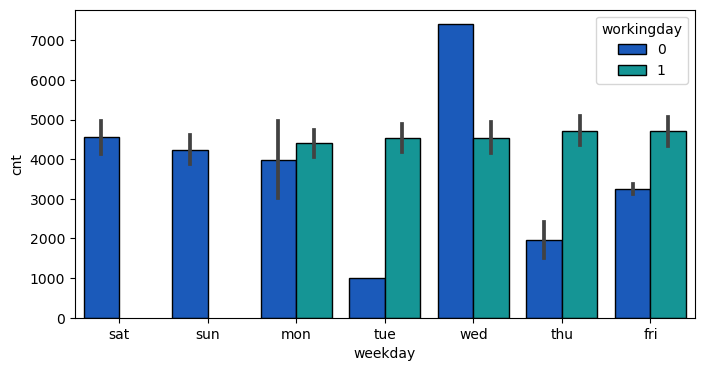

In [31]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = bikeSharing, x = "weekday" , y = "cnt", edgecolor = "black", palette = "winter", hue = "workingday" )
plt.show()

#### Observation : Bikes are rented more on a non-working wednesday,saturday and sunday. For rest of weekdays it is more on working day.


### Rent count across weekdays considering holiday


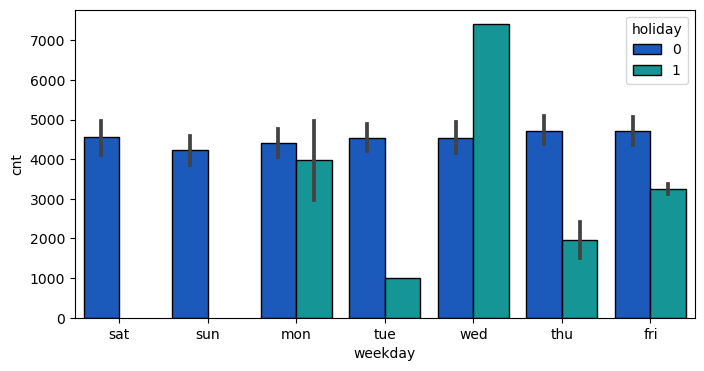

In [32]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = bikeSharing, x = "weekday" , y = "cnt", edgecolor = "black", palette = "winter", hue = "holiday" )
plt.show()

#### Observation : Bikes are rented more on a wednesday if it is a holiday, while it's less on other weekdays even if it's a holiday.

### Rent count across seasons with respect to weather


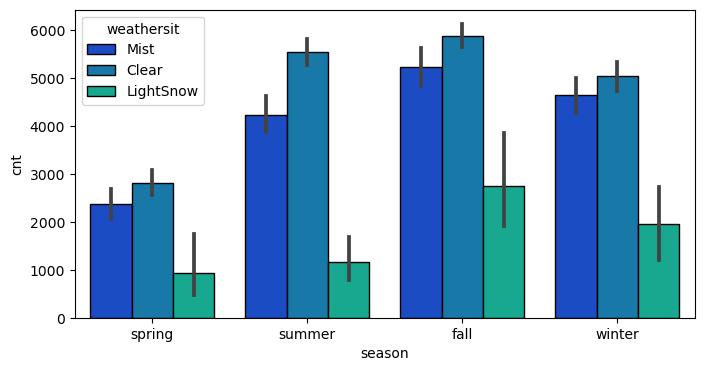

In [33]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = bikeSharing, x = "season" , y = "cnt", edgecolor = "black", palette = "winter", hue = "weathersit" )
plt.show()

#### Observation : Bikes are rented in fall season when weather is clear. Across all seasons, clearly rent count is more when weather is clear 

### Rent count across months and year


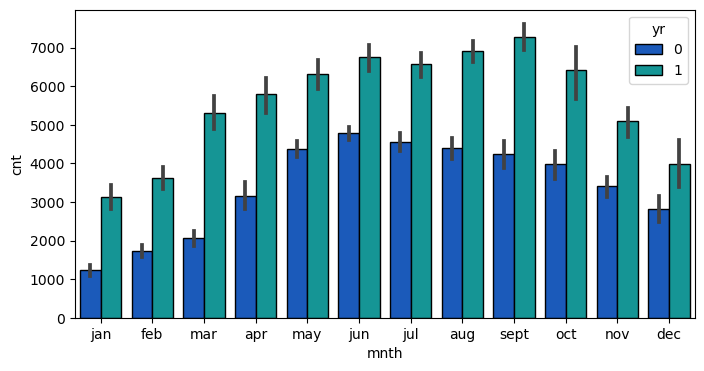

In [34]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = bikeSharing, x = "mnth" , y = "cnt", edgecolor = "black", palette = "winter", hue = "yr" )
plt.show()

#### Observation : We know that bikes rented has increased from 2018 to 2019. With above graph we can see that Sept has highest increase

### Rent count across temperature groups wrt seasons


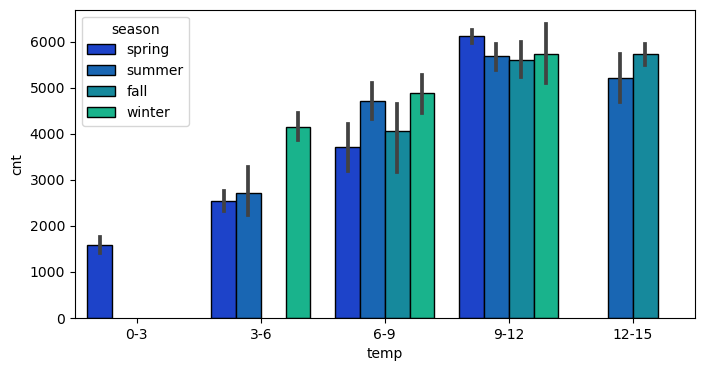

In [35]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = bikeSharing, x = temp_groups , y = "cnt", edgecolor = "black", palette = "winter", hue = "season" )
plt.show()

#### Observation : Bikes were rented maximum when temperature was between 9-12 in all seasons. So company should boost their service when temperature is more than 9 degree celsius regardless of season

### Bivariate Analysis Inference
- Bikes are generally rented more on working day .
- Interestingly the rent count is more on a wednesday when it is a holiday, compared to other weekdays
- Bikes are rented in fall season when weather is clear.
- Across all seasons, clearly rent count is more when weather is clear 
- We know that bikes rented has increased from 2018 to 2019. Sept has highest increase
- Bikes were rented maximum when temperature was between 9-12 in all seasons. So company should boost their service when temperature is more than 9 degree celsius regardless of season

## Dummy variables

Some of the variables seem to have multiple levels so let's create dummy variables for them

In [36]:
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [37]:
seasondummy = pd.get_dummies(bikeSharing['season'])
seasondummy.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


- We need n-1 dummy variables. Hence the following

In [38]:
seasondummy = pd.get_dummies(bikeSharing['season'], drop_first = True)
seasondummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, seasondummy], axis = 1)

In [40]:
monthdummy = pd.get_dummies(bikeSharing['mnth'])
monthdummy = pd.get_dummies(bikeSharing['mnth'], drop_first = True)
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, monthdummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sept
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,1,0,0,0,0,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,1,0,0,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,1,0,0,0,0,0,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,1,0,0,0,0,0,0,0


In [41]:
weekdaydummy = pd.get_dummies(bikeSharing['weekday'])
weekdaydummy = pd.get_dummies(bikeSharing['weekday'], drop_first = True)
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, weekdaydummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,may,nov,oct,sept,mon,sat,sun,thu,tue,wed
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,0,0,0,1,0,0,0,0
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,0,0,0,0,1,0,0,0
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,0,0,0,1,0,0,0,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,0,0,0,1,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,0,0,0,1


In [42]:
weathersitdummy = pd.get_dummies(bikeSharing['weathersit'])
weathersitdummy = pd.get_dummies(bikeSharing['weathersit'])
# Add the results to the original bikeSharing dataframe
bikeSharing = pd.concat([bikeSharing, weathersitdummy], axis = 1)
bikeSharing.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
0,01-01-2018,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,...,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,...,0,0,0,1,0,0,0,0,0,1
2,03-01-2018,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,...,0,1,0,0,0,0,0,1,0,0
3,04-01-2018,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,...,0,0,0,0,0,1,0,1,0,0
4,05-01-2018,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,...,0,0,0,0,0,0,1,1,0,0


In [43]:
bikeSharing.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [44]:
# drop the original columns after creating dummy variable columns

In [45]:
bikeSharing.drop(['season'], axis = 1, inplace = True)
bikeSharing.drop(['weathersit'], axis = 1, inplace = True)
bikeSharing.drop(['mnth'], axis = 1, inplace = True)
bikeSharing.drop(['weekday'], axis = 1, inplace = True)

In [46]:
bikeSharing.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [47]:
bikeSharing.shape

(730, 32)

In [48]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikeSharing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [49]:
print(df_train.shape)
print(df_test.shape)


(510, 32)
(219, 32)


In [50]:
df_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [51]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

### Rescaling the Features 


In [52]:
bikeSharing.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
0,01-01-2018,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,1
1,02-01-2018,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,1,0,0,0,0,0,1
2,03-01-2018,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,1,0,0,0,0,0,1,0,0
3,04-01-2018,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,1,0,0
4,05-01-2018,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,1,1,0,0


#### Apply scaler() to all the columns except the categorical and 'dummy' variables


In [53]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

scaler = MinMaxScaler()
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [54]:
df_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,...,0,0,0,0,0,1,0,1,0,0
576,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,...,0,0,0,0,0,1,0,1,0,0
426,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,...,0,0,1,0,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,0,0,0,1,0,0,0,1,0,0
482,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,0,1,0,0,0,0,0,0,1


In [55]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.627451,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.483958,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Cnt seemed to have linear realtion with temp and atemp so let's visualise the same

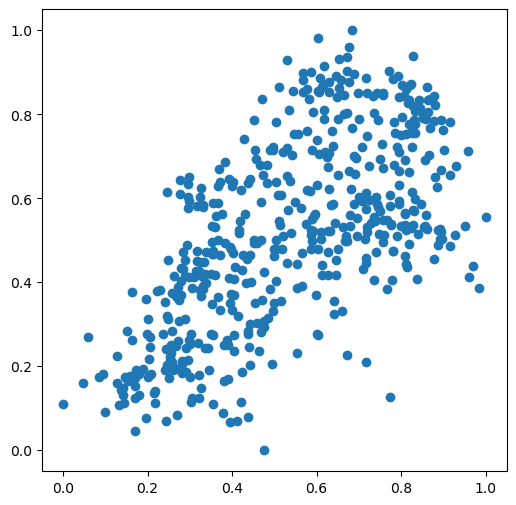

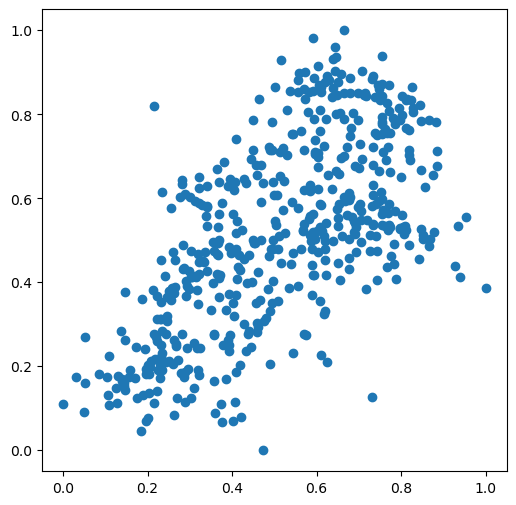

In [56]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [57]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


## Model 1


In [58]:
import statsmodels.api as sm

In [59]:
# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr0 = sm.OLS(y_train, X_train_lm).fit()

In [60]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [61]:
lr0.params

const    0.169798
temp     0.639952
dtype: float64

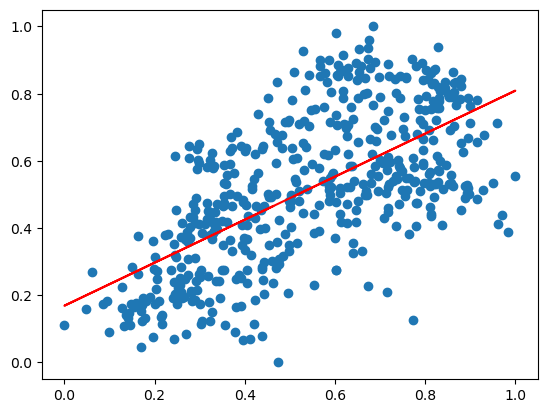

In [62]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.169 + 0.64*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [63]:
# Print a summary of the linear regression model obtained
print(lr0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           5.80e-61
Time:                        13:37:54   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.0

#### Observation : P values are 0 so temp is significant . R-squared: 0.414 and Adj. R-squared:0.413 which is good

### Model 2 : Let's add one more variable workingday


In [64]:
# Assign all the feature variables to X

X_train_lm = sm.add_constant(X_train[['temp','workingday']])

lr1 = sm.OLS(y_train, X_train_lm).fit()

In [65]:
X_train.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan',
       'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat', 'sun',
       'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [66]:
lr1.params

const         0.155697
temp          0.636654
workingday    0.023464
dtype: float64

In [67]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     180.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           4.92e-60
Time:                        13:37:54   Log-Likelihood:                 175.88
No. Observations:                 510   AIC:                            -345.8
Df Residuals:                     507   BIC:                            -333.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1557      0.022      7.088      0.0

#### Observation : P values of workingday is insignificant . R-squared: 0.416 and Adj. R-squared:0.414 , not much improvemnet so let's remove workingday and build for other variable/s

### Model 3 :Let's add variable hum


In [68]:
# Assign all the feature variables to X
X_train_lm = sm.add_constant(X_train[['temp','hum']])

lr2 = sm.OLS(y_train, X_train_lm).fit()

In [69]:
lr2.params

const    0.320358
temp     0.665293
hum     -0.252434
dtype: float64

In [70]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                     199.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.25e-64
Time:                        13:37:54   Log-Likelihood:                 186.52
No. Observations:                 510   AIC:                            -367.0
Df Residuals:                     507   BIC:                            -354.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3204      0.036      8.803      0.0

#### Observation : P values are insignificant after adding 'hum' . R-squared: 0.440 and Adj. R-squared:0.438 which is improvement from just 'temp'

### Model 4 :Adding all the variables to the model

In [71]:
X_train.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,16-10-2019,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,...,0,0,0,0,0,1,0,1,0,0
576,31-07-2019,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,...,0,0,0,0,0,1,0,1,0,0
426,03-03-2019,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,...,0,0,1,0,0,0,0,0,0,1
728,30-12-2019,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,0,0,0,1,0,0,0,1,0,0
482,28-04-2019,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,...,0,0,1,0,0,0,0,0,0,1


In [72]:
X_train.drop(['dteday'], axis = 1, inplace = True)

In [73]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,0,0,0,1,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,1,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,1,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [74]:
# Build linear model with all varibale
X_train_lm = sm.add_constant(X_train)

In [75]:
lr3 = sm.OLS(y_train, X_train_lm).fit()

In [76]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     99.96
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.42e-181
Time:                        13:37:54   Log-Likelihood:                 528.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     481   BIC:                            -875.3
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1267      0.030      4.290      0.0

#### Observation : Variables with high p values holiday, atemp, spring,summer, aug, dec, feb,jul,jun, mar,may,nov, oct, mon, thu, tue, wed

### Dropping the variable based on VIP and updating the model


In [77]:
# Check for the VIF values of the feature variables. 

In [78]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
29,Mist,inf
1,holiday,inf
2,workingday,inf
28,LightSnow,inf
27,Clear,inf
22,sat,inf
23,sun,inf
3,temp,67.12
4,atemp,56.09
7,spring,10.80


In [79]:
X = X_train.drop('atemp', 1,)

In [80]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr4 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.74e-182
Time:                        13:37:55   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1264      0.029      4.286      0.000       0.068       0.184
yr             0.2321      0.008     28.820      0.000       0.216       0.248
holiday       -0.0197      0.023     -0.847      0.397      -0.065       0.026
workingday     0.0672      0.011      5.909      0.000       0.045       0.090
temp           0.4506      0.046      9.734      0.000       0.360       0.542
hum           -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed     -0.1865      0.026     -7.257      0.000      -0.237      -0.136
spring        -0.0482      0.030     -1.607      0.109      -0.107       0.011
summer         0.0387      0.026      1.478      0.140      -0.013       0.090
winter         0.1058      0.028      3.794      0.000       0.051       0.161
aug            0.0144      0.034      0.428      0.669      -0.052       0.081
dec           -0.0456      0.034     -1.358      0.175      -0.112       0.020
feb           -0.0323      0.033     -0.982      0.327      -0.097       0.032
jan           -0.0628      0.034     -1.873      0.062      -0.129       0.003
jul           -0.0404      0.035     -1.151      0.250      -0.109       0.029
jun           -0.0030      0.025     -0.119      0.906      -0.052       0.046
mar            0.0010      0.025      0.043      0.966      -0.047       0.049
may            0.0239      0.021      1.140      0.255      -0.017       0.065
nov           -0.0419      0.036     -1.152      0.250      -0.113       0.030
oct            0.0075      0.036      0.211      0.833      -0.063       0.078
sept           0.0811      0.032      2.533      0.012       0.018       0.144
mon           -0.0209      0.015     -1.366      0.173      -0.051       0.009
sat            0.0667      0.013      5.151      0.000       0.041       0.092
sun            0.0122      0.013      0.915      0.360      -0.014       0.038
thu           -0.0092      0.016     -0.595      0.552      -0.040       0.021
tue           -0.0189      0.015     -1.219      0.223      -0.049       0.012
wed           -0.0054      0.015     -0.362      0.718      -0.035       0.024
Clear          0.1483      0.011     12.913      0.000       0.126       0.171
LightSnow     -0.1091      0.022     -5.035      0.000      -0.152      -0.067
Mist           0.0872      0.013      6.826      0.000       0.062       0.112
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     3.53e+15
==============================================================================

N

## It seems tedious to follow manual elimination method so switching to RFE

In [82]:
# Add required imports

In [83]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [84]:
rfe = RFE(lm,step =15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [85]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', False, 2),
 ('summer', False, 2),
 ('winter', True, 1),
 ('aug', False, 2),
 ('dec', False, 2),
 ('feb', False, 2),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 2),
 ('mar', False, 2),
 ('may', False, 2),
 ('nov', False, 2),
 ('oct', False, 2),
 ('sept', True, 1),
 ('mon', False, 2),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 2),
 ('tue', False, 2),
 ('wed', False, 2),
 ('Clear', True, 1),
 ('LightSnow', True, 1),
 ('Mist', True, 1)]

In [86]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','sun','Clear','LightSnow','Mist']]
col = col.columns

In [87]:
col = X_train.columns[rfe.support_]

In [88]:
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'winter',
       'jan', 'jul', 'sept', 'sat', 'sun', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [89]:
X_train.shape

(510, 30)

In [90]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [91]:
X_train_rfe.shape

(510, 15)

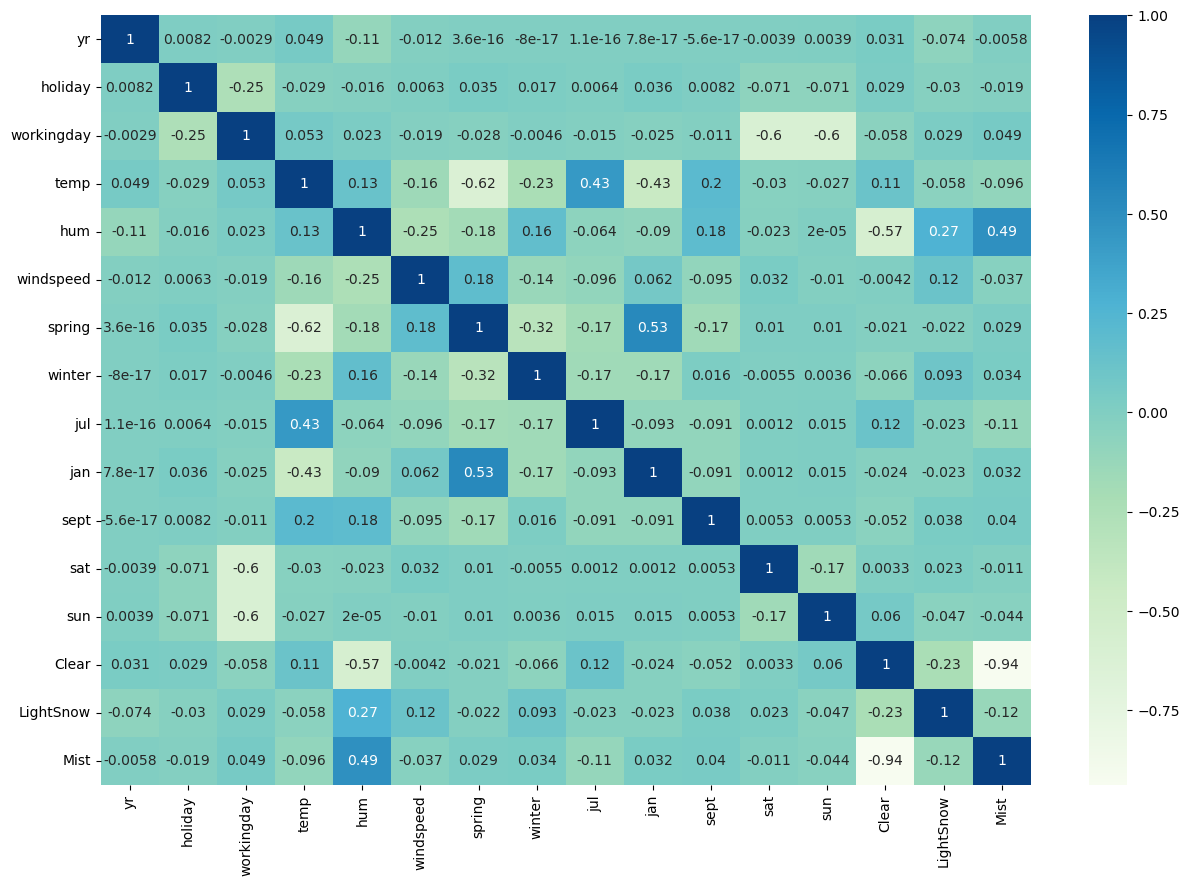

In [92]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(bikeSharing[['yr','holiday','workingday','temp','hum','windspeed',
                      'spring','winter','jul','jan','sept','sat','sun','Clear','LightSnow','Mist']].corr(), cmap='GnBu', annot=True)
plt.show()

### Building model using statsmodel, for the detailed statistics

### Model 1 : RFE

In [93]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','sun','Clear','LightSnow','Mist']]
col= col.columns

In [94]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [95]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [96]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        13:37:55   Log-Likelihood:                 493.77
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     496   BIC:                            -900.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0778      0.022      3.535      0.0

#### Observation : R-squared:0.832 , Adj. R-squared:0.828. p value of 'sun' and holiday seems high. Let's do VIF

In [97]:
#Function to calculate VIFs and print them using the columns for which VIF to be calcualted as a parameter
def calculateVIF(cols):
    df = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

In [98]:
col.shape

(15,)

In [99]:
calculateVIF(col)

      Features   VIF
1      holiday   inf
2   workingday   inf
10         sat   inf
11         sun   inf
12       Clear   inf
13   LightSnow   inf
14        Mist   inf
3         temp  2.05
4          hum  1.89
7          jan  1.45
8          jul  1.30
6       winter  1.29
5    windspeed  1.19
9         sept  1.11
0           yr  1.03


### Model 2 : RFE, eliminate variable 'sun'(Sunday) as p value was high and VIF is inf

In [100]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','Clear','LightSnow','Mist']]
col = col.columns

In [101]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe2 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [102]:
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        13:37:55   Log-Likelihood:                 493.77
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     496   BIC:                            -900.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0865      0.027      3.184      0.0

In [103]:
calculateVIF(col)

      Features    VIF
11       Clear  35.60
13        Mist  26.16
12   LightSnow   3.76
3         temp   2.05
4          hum   1.89
2   workingday   1.88
10         sat   1.78
7          jan   1.45
8          jul   1.30
6       winter   1.29
5    windspeed   1.19
1      holiday   1.16
9         sept   1.11
0           yr   1.03


### Model 3 : 'Clear' variable has high VIF so let's remove that

In [104]:
col = X_train[['yr','holiday','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [105]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe3 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [106]:
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     189.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.04e-182
Time:                        13:37:55   Log-Likelihood:                 493.77
No. Observations:                 510   AIC:                            -959.5
Df Residuals:                     496   BIC:                            -900.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2159      0.031      6.946      0.0

In [107]:
calculateVIF(col)

      Features    VIF
4          hum  19.57
3         temp  12.52
2   workingday   5.09
5    windspeed   3.76
12        Mist   2.14
0           yr   2.05
10         sat   1.92
6       winter   1.68
7          jan   1.48
8          jul   1.41
9         sept   1.20
11   LightSnow   1.19
1      holiday   1.16


### Model 4: holiday has high p values so let's remove that

In [108]:
col = X_train[['yr','workingday','temp','hum','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [109]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe4 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [110]:
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.8
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.06e-182
Time:                        13:37:55   Log-Likelihood:                 490.98
No. Observations:                 510   AIC:                            -956.0
Df Residuals:                     497   BIC:                            -900.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2046      0.031      6.634      0.0

In [111]:
calculateVIF(col)

      Features    VIF
3          hum  19.24
2         temp  12.51
1   workingday   4.58
4    windspeed   3.71
11        Mist   2.13
0           yr   2.05
9          sat   1.80
5       winter   1.68
6          jan   1.47
7          jul   1.41
8         sept   1.19
10   LightSnow   1.18


### Model 5 : variable 'hum'(humidity) has high VIF so let's remove that

In [112]:
col = X_train[['yr','workingday','temp','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [113]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe5 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [114]:
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     213.9
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.09e-180
Time:                        13:37:55   Log-Likelihood:                 483.41
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     498   BIC:                            -892.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1191      0.022      5.462      0.0

In [115]:
calculateVIF(col)

      Features   VIF
2         temp  6.14
1   workingday  4.28
3    windspeed  3.50
0           yr  2.05
8          sat  1.75
10        Mist  1.55
6          jul  1.37
4       winter  1.34
5          jan  1.24
7         sept  1.19
9    LightSnow  1.08


In [116]:
# plot few more models using different variblle untill R2 is good, VIF is low and p is 0

### Model 6 : variable 'temp' has high VIF so let's remove to see how model turns out that even though we know it's significant from EDA

In [117]:
col = X_train[['yr','workingday','windspeed',
                      'winter','jan','jul','sept','sat','LightSnow','Mist']]
col = col.columns

In [118]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe6 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [119]:
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     97.65
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.08e-110
Time:                        13:37:55   Log-Likelihood:                 314.98
No. Observations:                 510   AIC:                            -608.0
Df Residuals:                     499   BIC:                            -561.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4577      0.021     21.749      0.0

In [120]:
calculateVIF(col)

     Features   VIF
1  workingday  3.14
2   windspeed  3.13
0          yr  1.88
9        Mist  1.54
7         sat  1.53
3      winter  1.34
4         jan  1.14
5         jul  1.11
6        sept  1.10
8   LightSnow  1.08


#### Observation : as we can see R2 and Adj R2 dropped significantly so let's keep temp 

#### Model 7: Also 'jul' and 'temp' had high correlation(heatmap) hence let's remove jul and add back 'temp'

In [121]:
col = X_train[['temp','yr','workingday','windspeed',
                      'winter','jan','sept','sat','LightSnow','Mist']]
col = col.columns

In [122]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe7 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [123]:
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.43e-178
Time:                        13:37:55   Log-Likelihood:                 475.05
No. Observations:                 510   AIC:                            -928.1
Df Residuals:                     499   BIC:                            -881.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1315      0.022      5.999      0.0

In [124]:
calculateVIF(col)

     Features   VIF
0        temp  4.99
2  workingday  4.24
3   windspeed  3.45
1          yr  2.04
7         sat  1.74
9        Mist  1.54
4      winter  1.32
5         jan  1.24
6        sept  1.15
8   LightSnow  1.08


#### Observation :now R2 and Adj R2 seem good. Let's continue

#### Model seems good wrt p values and VIF but let's go back to out correlation matrix to better the model

#### Model 8: 'jan' and 'spring' had high correlation(heatmap) hence let's remove jan and add 'spring'

In [125]:
col = X_train[['temp','yr','workingday','windspeed',
                      'winter','sept','sat','LightSnow','Mist','spring']]
col = col.columns

In [126]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe8 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [127]:
print(lm_rfe8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     247.0
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          4.83e-186
Time:                        13:37:55   Log-Likelihood:                 493.23
No. Observations:                 510   AIC:                            -964.5
Df Residuals:                     499   BIC:                            -917.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2174      0.025      8.550      0.0

In [128]:
calculateVIF(col)

     Features   VIF
0        temp  5.48
2  workingday  4.44
3   windspeed  4.07
1          yr  2.06
9      spring  1.81
6         sat  1.79
8        Mist  1.53
4      winter  1.43
5        sept  1.15
7   LightSnow  1.08


#### Observation : Slight increase in R2 and Adj R2 also F stat is improving

#### Model 9: Let's replace 'sat' with 'sun'

In [129]:
col = X_train[['temp','yr','workingday','windspeed',
                      'winter','sept','sun','LightSnow','Mist','spring']]
col = col.columns

In [130]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe9 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [131]:
print(lm_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     239.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          2.22e-183
Time:                        13:37:55   Log-Likelihood:                 486.95
No. Observations:                 510   AIC:                            -951.9
Df Residuals:                     499   BIC:                            -905.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2679      0.026     10.438      0.0

In [132]:
calculateVIF(col)

     Features   VIF
0        temp  5.55
2  workingday  4.22
3   windspeed  4.00
1          yr  2.06
9      spring  1.81
6         sun  1.68
8        Mist  1.51
4      winter  1.44
5        sept  1.16
7   LightSnow  1.08


#### Model 10: p value of workingday has increased hence remove

In [133]:
col = X_train[['temp','yr','windspeed',
                      'winter','sept','sun','LightSnow','Mist','spring']]
col = col.columns

In [134]:
X_train_rfe = X_train[col]
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm_rfe10 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [135]:
print(lm_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     266.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          1.48e-184
Time:                        13:37:55   Log-Likelihood:                 486.82
No. Observations:                 510   AIC:                            -953.6
Df Residuals:                     500   BIC:                            -911.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2722      0.024     11.319      0.0

In [136]:
calculateVIF(col)

    Features   VIF
2  windspeed  3.94
0       temp  3.83
1         yr  2.05
8     spring  1.65
7       Mist  1.50
3     winter  1.37
5        sun  1.17
4       sept  1.16
6  LightSnow  1.08


#### Observation : 
- R2 is 0.828
- Adj R2 is 0.825
- F stat is 266.7, has also improved after removing workingday

### The model-> lm_rfe10 seems good so let's Analyse and evaluate


### Tried couple of more models but it seems to edge towards Overfitting. We already have significant variables with VIF below 5. Hence going ahead with model 10

In [137]:
# col = X_train[['temp','yr','holiday','windspeed',
#                       'winter','sept','sun','LightSnow','Mist','spring']]
# col = col.columns

In [138]:
# # Checking correlation of features selected by RFE with target column. 
# # Also to check impact of different features on target.
# plt.figure(figsize = (15,10))
# sns.heatmap(bikeSharing[['yr','temp','windspeed','holiday',
#                       'spring','winter','sept','sun','LightSnow','Mist']].corr(), cmap='GnBu', annot=True)
# plt.show()

#### Model 11: windspeed seems to be coreelated with spring and lightsnow so let's eliminate that

In [139]:
# col = X_train[['temp','yr','holiday','winter','sept','sun','LightSnow','Mist','spring']]
# col = col.columns

In [140]:
# X_train_rfe = X_train[col]
# # Adding a constant variable 
# X_train_rfe = sm.add_constant(X_train_rfe)

# lm_rfe10 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [141]:
# print(lm_rfe10.summary())

In [142]:
# calculateVIF(col)

In [143]:
# # Checking correlation of features selected by RFE with target column. 
# # Also to check impact of different features on target.
# plt.figure(figsize = (15,10))
# sns.heatmap(bikeSharing[['yr','temp','holiday',
#                       'spring','winter','sept','sun','LightSnow','Mist']].corr(), cmap='GnBu', annot=True)
# plt.show()

In [144]:
# col = X_train[['temp','yr',
#                       'winter','sept','sat','LightSnow','Mist','spring']]
# col = col.columns

In [145]:
# X_train_rfe = X_train[col]
# # Adding a constant variable 
# X_train_rfe = sm.add_constant(X_train_rfe)

# lm_rfe11 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [146]:
# print(lm_rfe11.summary())

## Step 7: Residual Analysis of the train data


In [147]:
y_train_pred = lm_rfe10.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

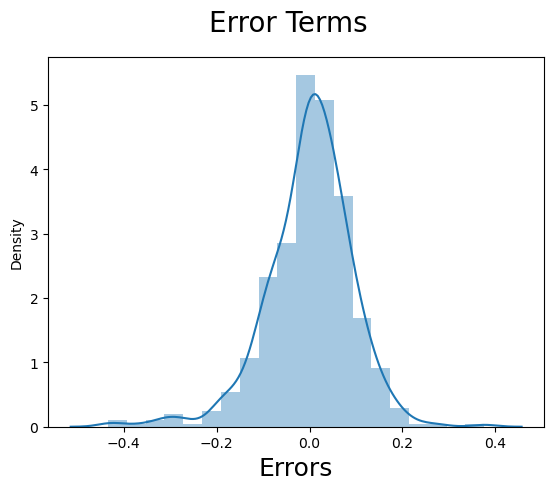

In [148]:
# Plot the t of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation : Error terms are normally distributed

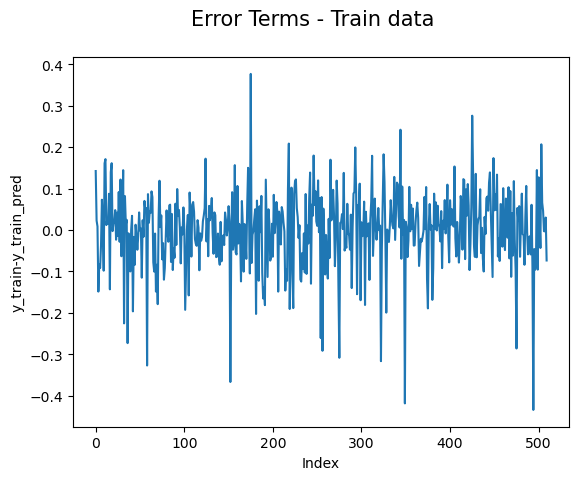

In [149]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms - Train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation : The variance of the error terms seems to be constant

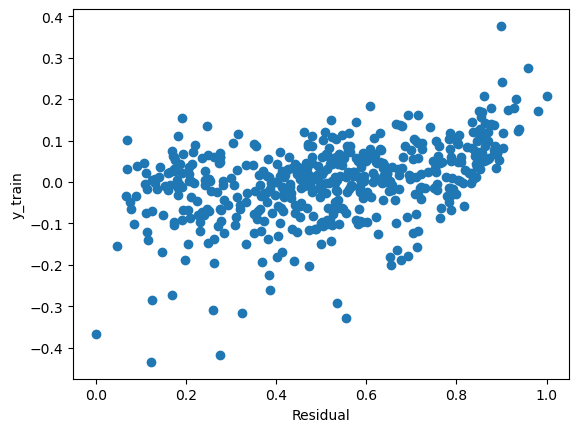

In [150]:
# Scatter plot to the check Linearity
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

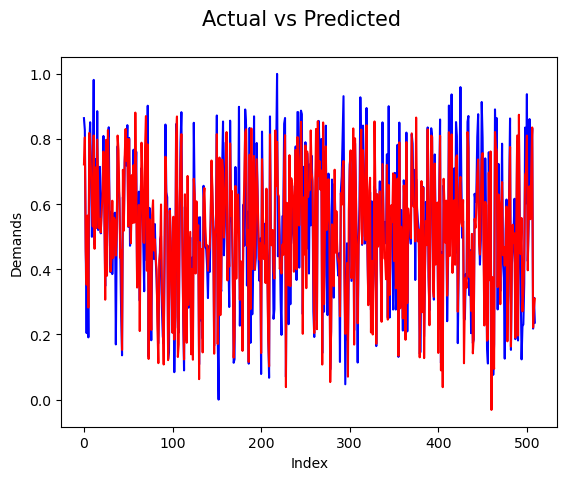

In [151]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation : Actual and Predicted result seem to follow same pattern so this model seems good

In [152]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8276271388649432

### Observation : r2_score is same to what we got in Model 10

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final  model.

### Applying the scaling on the test sets
##### We never fit the scalar on test data set, we only transform() 
- this is because test should not learn, only training data set should be used to learn the model 
- test data is used to predictlm_rfe11

In [153]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [154]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [155]:
df_test.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'spring', 'summer', 'winter', 'aug', 'dec', 'feb',
       'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sept', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed', 'Clear', 'LightSnow', 'Mist'],
      dtype='object')

In [156]:
df_test.shape

(219, 32)

In [157]:
df_test.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,...,sept,mon,sat,sun,thu,tue,wed,Clear,LightSnow,Mist
184,04-07-2018,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,...,0,1,0,0,0,0,0,0,0,1
535,20-06-2019,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,...,0,0,0,0,0,0,1,1,0,0
299,27-10-2018,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,...,0,0,0,0,1,0,0,0,0,1
221,10-08-2018,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,...,0,0,0,0,0,0,1,1,0,0
152,02-06-2018,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,...,0,0,0,0,1,0,0,1,0,0


In [158]:
y_test = df_test.pop('cnt')
X_test = df_test

In [159]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      219 non-null    object 
 1   yr          219 non-null    int64  
 2   holiday     219 non-null    int64  
 3   workingday  219 non-null    int64  
 4   temp        219 non-null    float64
 5   atemp       219 non-null    float64
 6   hum         219 non-null    float64
 7   windspeed   219 non-null    float64
 8   spring      219 non-null    uint8  
 9   summer      219 non-null    uint8  
 10  winter      219 non-null    uint8  
 11  aug         219 non-null    uint8  
 12  dec         219 non-null    uint8  
 13  feb         219 non-null    uint8  
 14  jan         219 non-null    uint8  
 15  jul         219 non-null    uint8  
 16  jun         219 non-null    uint8  
 17  mar         219 non-null    uint8  
 18  may         219 non-null    uint8  
 19  nov         219 non-null    

In [160]:
X_train_rfe.columns

Index(['const', 'temp', 'yr', 'windspeed', 'winter', 'sept', 'sun',
       'LightSnow', 'Mist', 'spring'],
      dtype='object')

In [161]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [162]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [163]:
#Predict the values for test data
y_test_pred = lm_rfe10.predict(X_test_new)

In [164]:
#Next find r2 and plot graph

## Step 9: Model Evaluation
Let's now plot the graph for actual versus predicted values.

In [165]:
r2_score(y_true= y_test , y_pred= y_test_pred) 

0.8044345200070139

### Plotting y_test and y_pred to understand the spread


Text(0, 0.5, 'y_pred')

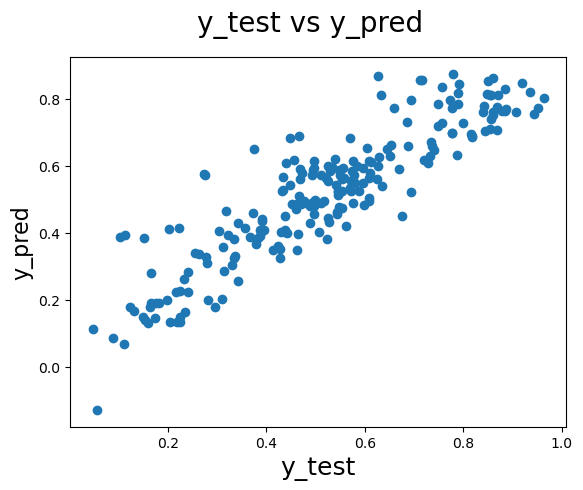

In [166]:
# Scatter plot
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Comparison of actual and predicted values

Text(0, 0.5, 'Views')

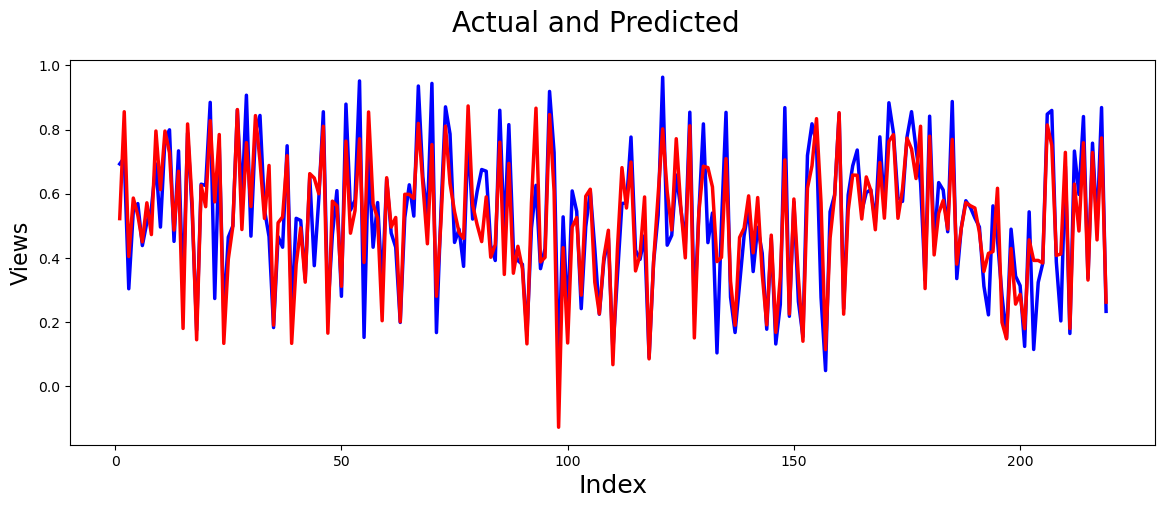

In [167]:
 
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_test_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

### Error Terms of test data set

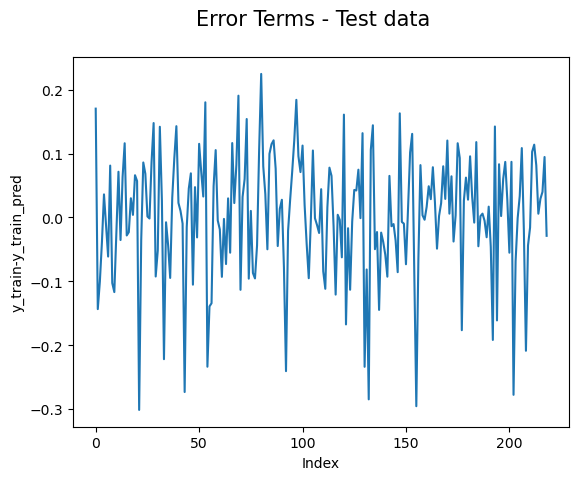

In [168]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.plot(c,y_test-y_test_pred)
plt.suptitle('Error Terms - Test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

## Conclusion

In [169]:
#Print R-squared Value on Training set
r2_score(y_train,y_train_pred)

0.8276271388649432

In [170]:
#Print R-squared Value on Test set
r2_score(y_test,y_test_pred)

0.8044345200070139

In [171]:
# Coefficeints for variables from final model with p value 0 and minimized VIF

- temp	0.4092
- yr	0.2356
- windspeed	-0.1373
- winter	0.0469
- sept	0.0643
- sun	-0.0460
- LightSnow	-0.2890
- Mist	-0.0788
- spring	-0.1184


The equation of our best fitted line is:

$ cnt = 0.4092  \times  temp + 0.2356  \times  yr  -0.1373 \times windspeed + 0.0469 \times winter + 0.0643 \times sept  -0.0460 \times sun  -0.2890 \times LightSnow - 0.0788 \times Mist - 0.1184 \times spring + 0.2722$


#### Top 3 features contributing significantly towards explaining the demand of the shared bikes
1. temp(temperature) : Bikes were rented maximum when temperature was between 9-12 in all seasons. So company should boost their service when temperature is more than 9 degree celsius regardless of season
2. yr(year): Number of bike rentals has increased in 2019 compared to 2018 which is a good sign for Boombikes as bike renting trend is showing up curve
3. september month and season , since sept has good postive coefficient indicates increase in bike rents, which is beginning of fall season in US where as LightSnow's negative coefficient indicates decrease in rent count
